<a href="https://colab.research.google.com/github/Aishwaryagithubit/Brain_Tumor_detect/blob/main/TumorDetect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Brain Tumor Detection using Convolutional Neural Networks**
The goal of this project is to automate the early detection of brain tumors from MRI scans, which can help doctors diagnose faster and more accurately.

Data Source: https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection



In [ ]:
from google.colab import files
uploaded = files.upload()

Saving brain_tumor_dataset.zip to brain_tumor_dataset.zip


In [ ]:
!unzip /content/brain_tumor_dataset.zip

Archive:  /content/brain_tumor_dataset.zip
   creating: brain_tumor_dataset/
   creating: brain_tumor_dataset/no/
  inflating: brain_tumor_dataset/no/1 no.jpeg  
  inflating: brain_tumor_dataset/no/10 no.jpg  
  inflating: brain_tumor_dataset/no/11 no.jpg  
  inflating: brain_tumor_dataset/no/12 no.jpg  
  inflating: brain_tumor_dataset/no/13 no.jpg  
  inflating: brain_tumor_dataset/no/14 no.jpg  
  inflating: brain_tumor_dataset/no/15 no.jpg  
  inflating: brain_tumor_dataset/no/17 no.jpg  
  inflating: brain_tumor_dataset/no/18 no.jpg  
  inflating: brain_tumor_dataset/no/19 no.jpg  
  inflating: brain_tumor_dataset/no/2 no.jpeg  
  inflating: brain_tumor_dataset/no/20 no.jpg  
  inflating: brain_tumor_dataset/no/21 no.jpg  
  inflating: brain_tumor_dataset/no/22 no.jpg  
  inflating: brain_tumor_dataset/no/23 no.jpg  
  inflating: brain_tumor_dataset/no/24 no.jpg  
  inflating: brain_tumor_dataset/no/25 no.jpg  
  inflating: brain_tumor_dataset/no/26 no.jpg  
  inflating: brain_tum

In [ ]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.applications import VGG16
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils.class_weight import compute_class_weight
from google.colab import files
import cv2

# loading and preprocessing dataset
data_dir = "/content/brain_tumor_dataset"

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

# creating training and validation data generators
train_data = datagen.flow_from_directory(
    data_dir,
    target_size=(128,128),
    batch_size=32,
    class_mode='binary',
    subset='training',
    shuffle=True
)

val_data = datagen.flow_from_directory(
    data_dir,
    target_size=(128,128),
    batch_size=32,
    class_mode='binary',
    subset='validation',
    shuffle=False
)


Found 203 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


In [ ]:
# Handle Class Imbalance
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_data.classes),
    y=train_data.classes
)
class_weights = dict(enumerate(class_weights))
print("Class Weights:", class_weights)

Class Weights: {0: np.float64(1.2848101265822784), 1: np.float64(0.8185483870967742)}


In [ ]:
# Build Transfer Learning model (VGG16)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128,128,3))
base_model.trainable = False  # freeze base layers

#add custom layers
x = Flatten()(base_model.output)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=output)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 128, 128, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 128, 128, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 64, 64, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 16, 16, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,048,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,763,521 (60.13 MB)

 Trainable params: 1,048,833 (4.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
# Early stopping
es = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [ ]:
# Train the model
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=15,
    callbacks=[es],
    class_weight=class_weights
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 50s 7s/step - accuracy: 0.5833 - loss: 0.9198 - val_accuracy: 0.7600 - val_loss: 0.4469
Epoch 2/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 53s 8s/step - accuracy: 0.7806 - loss: 0.4492 - val_accuracy: 0.8400 - val_loss: 0.4153
Epoch 3/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 49s 7s/step - accuracy: 0.8555 - loss: 0.3769 - val_accuracy: 0.7600 - val_loss: 0.4525
Epoch 4/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 47s 7s/step - accuracy: 0.8247 - loss: 0.3591 - val_accuracy: 0.7800 - val_loss: 0.3909
Epoch 5/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 49s 7s/step - accuracy: 0.8741 - loss: 0.3610 - val_accuracy: 0.8000 - val_loss: 0.4419
Epoch 6/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 47s 7s/step - accuracy: 0.8409 - loss: 0.3265 - val_accuracy: 0.8000 - val_loss: 0.3291
Epoch 7/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 49s 7s/step - accuracy: 0.9189 - loss: 0.2500 - val_accuracy: 0.8000 - val_loss: 0.3739
Epoch 8/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 47s 8s/step - accuracy: 0.9101 - loss: 0.2446 - val_accuracy: 0.8200 - val_loss: 0.3116
Epoch 9/

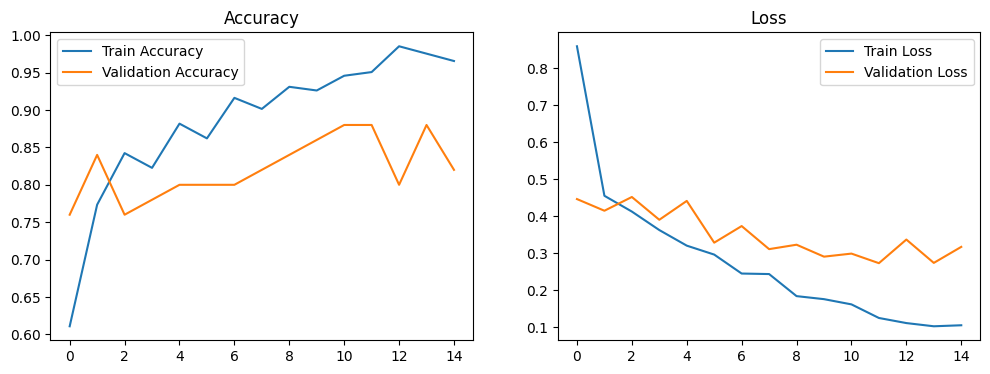

In [ ]:
# Plot Accuracy and Loss
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Accuracy")

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Loss")
plt.show()

Saving Y12.jpg to Y12.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


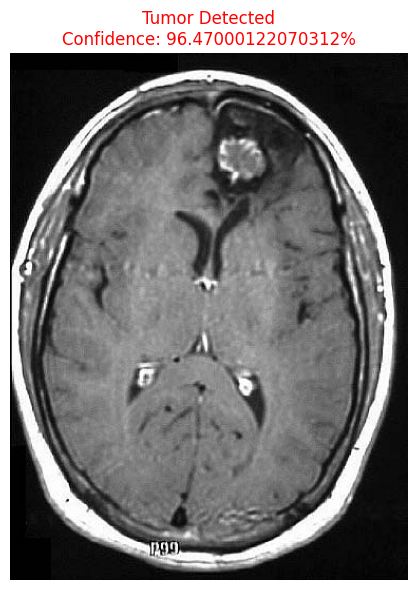

In [ ]:

# upload and prediction
uploaded = files.upload()

fig, axes = plt.subplots(1, len(uploaded), figsize=(6*len(uploaded),6))
if len(uploaded) == 1:
    axes = [axes]

for ax, fn in zip(axes, uploaded.keys()):
    # Load and preprocess
    img = load_img(fn, target_size=(128,128))
    img_array = np.expand_dims(img_to_array(img)/255.0, axis=0)

    # Predict
    prediction = model.predict(img_array)[0][0]
    if prediction > 0.5:
        label = "Tumor Detected"
        color = "red"
        confidence = round(prediction*100,2)
    else:
        label = "No Tumor Detected"
        color = "green"
        confidence = round((1-prediction)*100,2)

    # Display original image with border
    ax.imshow(load_img(fn))
    ax.axis("off")
    for spine in ax.spines.values():
        spine.set_edgecolor(color)
        spine.set_linewidth(8)
    ax.set_title(f"{label}\nConfidence: {confidence}%", fontsize=12, color=color)

plt.tight_layout()
plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 10s 4s/step


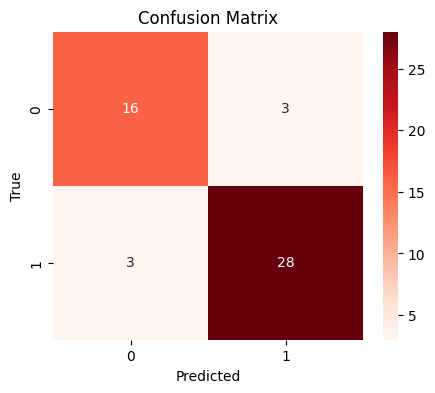

              precision    recall  f1-score   support

    No Tumor       0.84      0.84      0.84        19
       Tumor       0.90      0.90      0.90        31

    accuracy                           0.88        50
   macro avg       0.87      0.87      0.87        50
weighted avg       0.88      0.88      0.88        50



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Model evaluation
Y_pred = model.predict(val_data)
Y_pred_classes = (Y_pred > 0.5).astype("int32").flatten()  # flatten to 1D

# True labels
Y_true = val_data.classes

# Confusion matrix
cm = confusion_matrix(Y_true, Y_pred_classes)


plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Classification report
print(classification_report(Y_true, Y_pred_classes, target_names=['No Tumor','Tumor']))



# Conclusion
My model performed really well using the VGG16 architecture. It learned to detect brain tumors accurately and avoided overfitting thanks to early stopping and data preprocessing.

The main challenge was having a small and slightly imbalanced dataset, which sometimes affected validation results.

I want to try other models like ResNet and use a larger dataset to improve accuracy and reliability.

Overall, this project really helped me understand how deep learning can support real world medical diagnosis.